In [41]:
import os
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

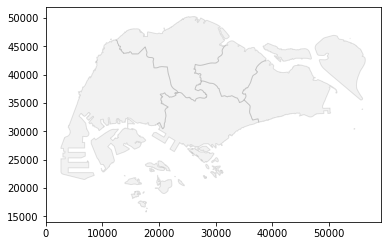

In [47]:
os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [4]:
data_dir = "../data/OD_bus"

In [5]:
fs = os.listdir(data_dir)
fs = sorted([ f for f in fs if "weekday" in f ])
fs

['OD_201912_weekday_00.csv',
 'OD_201912_weekday_01.csv',
 'OD_201912_weekday_02.csv',
 'OD_201912_weekday_03.csv',
 'OD_201912_weekday_04.csv',
 'OD_201912_weekday_05.csv',
 'OD_201912_weekday_06.csv',
 'OD_201912_weekday_07.csv',
 'OD_201912_weekday_08.csv',
 'OD_201912_weekday_09.csv',
 'OD_201912_weekday_10.csv',
 'OD_201912_weekday_11.csv',
 'OD_201912_weekday_12.csv',
 'OD_201912_weekday_13.csv',
 'OD_201912_weekday_14.csv',
 'OD_201912_weekday_15.csv',
 'OD_201912_weekday_16.csv',
 'OD_201912_weekday_17.csv',
 'OD_201912_weekday_18.csv',
 'OD_201912_weekday_19.csv',
 'OD_201912_weekday_20.csv',
 'OD_201912_weekday_21.csv',
 'OD_201912_weekday_22.csv',
 'OD_201912_weekday_23.csv']

In [6]:
f = fs[0]

In [7]:
fp = os.path.join(data_dir, f)
fp

'../data/OD_bus/OD_201912_weekday_00.csv'

In [8]:
df = pd.read_csv(fp, index_col=0)
df.head()

,origin,destination,hour,flow
ind,,,,
0,TAMPINES EAST,RIVERVALE,0,4047
1,MACPHERSON,LORONG 8 TOA PAYOH,0,209
2,ANAK BUKIT,HILLVIEW,0,6289
3,HILLVIEW,NORTH COAST,0,1748
4,CLARKE QUAY,ROBERTSON QUAY,0,798


In [9]:
df[pd.isnull(df["origin"])]

,origin,destination,hour,flow
ind,,,,
2085,NaN,ROCHOR CANAL,0,3401
2725,NaN,JURONG GATEWAY,0,2128
6055,NaN,HILLCREST,0,171
6503,NaN,NaN,0,15732
7656,NaN,NORTH COAST,0,37430
7672,NaN,WOODLANDS WEST,0,190
7918,NaN,WOODLANDS REGIONAL CENTRE,0,684
8247,NaN,NATURE RESERVE,0,19
9318,NaN,TURF CLUB,0,266


In [10]:
df[pd.isnull(df["destination"])]

,origin,destination,hour,flow
ind,,,,
623,NORTH COAST,NaN,0,176909
2084,ROCHOR CANAL,NaN,0,437
2221,MACKENZIE,NaN,0,57
3357,GOMBAK,NaN,0,76
4783,KRANJI,NaN,0,1197
6503,NaN,NaN,0,15732
6702,JURONG GATEWAY,NaN,0,57
7574,GALI BATU,NaN,0,76
7686,NEWTON CIRCUS,NaN,0,19


checked and these nan are all at JB, see prep_bus_loc.ipynb

In [11]:
df2 = df.dropna(subset=["origin", "destination"])

In [12]:
df2[pd.isnull(df2["destination"])]

,origin,destination,hour,flow
ind,,,,


In [13]:
recs = []
for i in range(len(df2)):
    row = df2.iloc[i]
    o = row["origin"]
    d = row['destination']
    f = row['flow']
    recs.append((o,d,{"weight":f}))

In [14]:
dg = nx.DiGraph()
dg.add_edges_from(recs)
dg.number_of_nodes(), dg.number_of_edges()

(296, 9347)

In [15]:
print(dg.nodes())

['TAMPINES EAST', 'RIVERVALE', 'MACPHERSON', 'LORONG 8 TOA PAYOH', 'ANAK BUKIT', 'HILLVIEW', 'NORTH COAST', 'CLARKE QUAY', 'ROBERTSON QUAY', 'ROCHOR CANAL', 'ALJUNIED', 'SINGAPORE GENERAL HOSPITAL', 'DOVER', 'HOUGANG EAST', 'SELETAR HILLS', 'YUHUA WEST', 'WOODLANDS WEST', 'KEMBANGAN', 'YUNNAN', 'BOON LAY PLACE', 'SIMEI', 'KAKI BUKIT', 'TOA PAYOH CENTRAL', 'BRADDELL', 'PASIR RIS DRIVE', 'BEDOK NORTH', 'TEBAN GARDENS', 'CLEMENTI CENTRAL', 'YISHUN WEST', 'CITY HALL', 'CHINATOWN', 'BENDEMEER', 'SERANGOON GARDEN', 'ANCHORVALE', 'BISHAN EAST', 'LAVENDER', 'YUHUA EAST', 'CENTRAL WATER CATCHMENT', 'BUKIT BATOK CENTRAL', 'SENJA', 'TRAFALGAR', 'HOUGANG CENTRAL', 'TOH GUAN', 'MANDAI EAST', 'CHONG BOON', 'BALESTIER', 'TAGORE', 'FARRER PARK', 'RIDOUT', 'FARRER COURT', 'ONE TREE HILL', 'MEI CHIN', 'TECK WHYE', 'BUKIT BATOK WEST', 'HONG KAH NORTH', 'MOUNTBATTEN', 'LORONG AH SOO', 'GEYLANG EAST', 'BEDOK RESERVOIR', 'KOVAN', 'YISHUN CENTRAL', 'BOON KENG', 'KATONG', 'HOLLAND ROAD', 'PASIR PANJANG 1', 'T

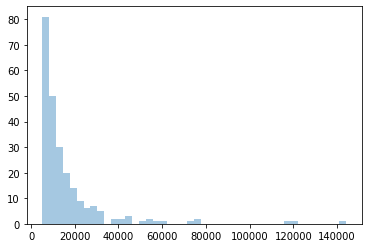

In [16]:
weights = []
for u,v,d in dg.edges(data=True):
    if d["weight"]>5000:
        weights.append(d["weight"])
sns.distplot(weights, kde=False)

In [ ]:
weights = []
for u,v,d in dg.edges(data=True):
    weights.append((d["weight"], u, v))
weights = sorted(weights, reverse=True)


In [27]:
print(list(pos.keys()))

['MARINA SOUTH', "PEARL'S HILL", 'BOAT QUAY', 'HENDERSON HILL', 'REDHILL', 'ALEXANDRA HILL', 'BUKIT HO SWEE', 'CLARKE QUAY', 'PASIR PANJANG 1', 'QUEENSWAY', 'KENT RIDGE', 'ALEXANDRA NORTH', 'MARINA EAST', 'INSTITUTION HILL', 'ROBERTSON QUAY', 'JURONG ISLAND AND BUKOM', 'SUDONG', 'SEMAKAU', 'SOUTHERN GROUP', 'SENTOSA', 'CITY TERMINALS', 'ANSON', 'STRAITS VIEW', 'MARITIME SQUARE', 'TELOK BLANGAH WAY', 'MAXWELL', 'CECIL', 'KAMPONG TIONG BAHRU', 'TELOK BLANGAH DRIVE', 'PASIR PANJANG 2', 'CENTRAL SUBZONE', 'SINGAPORE GENERAL HOSPITAL', 'DEPOT ROAD', "PEOPLE'S PARK", 'BUKIT MERAH', 'CHINATOWN', 'PHILLIP', 'RAFFLES PLACE', 'CHINA SQUARE', 'TIONG BAHRU', 'BAYFRONT SUBZONE', 'TIONG BAHRU STATION', 'CLIFFORD PIER', 'MARINA EAST (MP)', 'MARINA CENTRE', 'BRAS BASAH', 'OXLEY', 'CITY HALL', 'MEI CHIN', 'EAST COAST', "NATIONAL UNIVERSITY OF S'PORE", 'ONE TREE HILL', 'SOMERSET', 'BENCOOLEN', 'LEONIE HILL', 'PORT', 'DHOBY GHAUT', 'BUGIS', 'VICTORIA', 'PATERSON', 'TELOK BLANGAH RISE', 'TANJONG PAGAR', '

In [48]:
def draw_fig(dg, hr):
    weights = []
    for u,v,d in dg.edges(data=True):
        weights.append((d["weight"], u, v))
    weights = sorted(weights, reverse=True)
    
    fig, ax = plt.subplots(figsize=(20,10))
    nx.draw_networkx_nodes(dg, node_size=10, pos=pos, ax=ax)
    
    threshold = 3000
    if len(weights)>threshold:
        break_val = int(float(threshold)/3.)
    else:
        break_val = int(float(len(weights))/3.)
    edges1 = [ (u,v) for w,u,v in weights[0:break_val] ]
    edges2 = [ (u,v) for w,u,v in weights[break_val:break_val*2] ]
    edges3 = [ (u,v) for w,u,v in weights[break_val*2:break_val*3] ]
    nx.draw_networkx_edges(dg, edgelist=edges1, width=1., edge_color="red", pos=pos, ax=ax)
    nx.draw_networkx_edges(dg, edgelist=edges2, width=0.5, edge_color="blue", pos=pos, ax=ax)
    nx.draw_networkx_edges(dg, edgelist=edges3, width=0.1, edge_color="green", pos=pos, ax=ax)
    
    ax.set_aspect("equal")
    region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)
    ax.set_xlim([5000,50000])
    ax.set_ylim([25000,50000])
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_title("bus flow, weekday, hour: {}, count edges: {}".format(hr, str(len(weights))))
    plt.tight_layout()
    figout = os.path.join("bus_flow_fig", "fig_bus_weekday_{}.png".format(hr))
    plt.savefig(figout, dpi=300, bbox_inches="tight")
    plt.close()

OD_201912_weekday_00.csv
00 323 9347
done


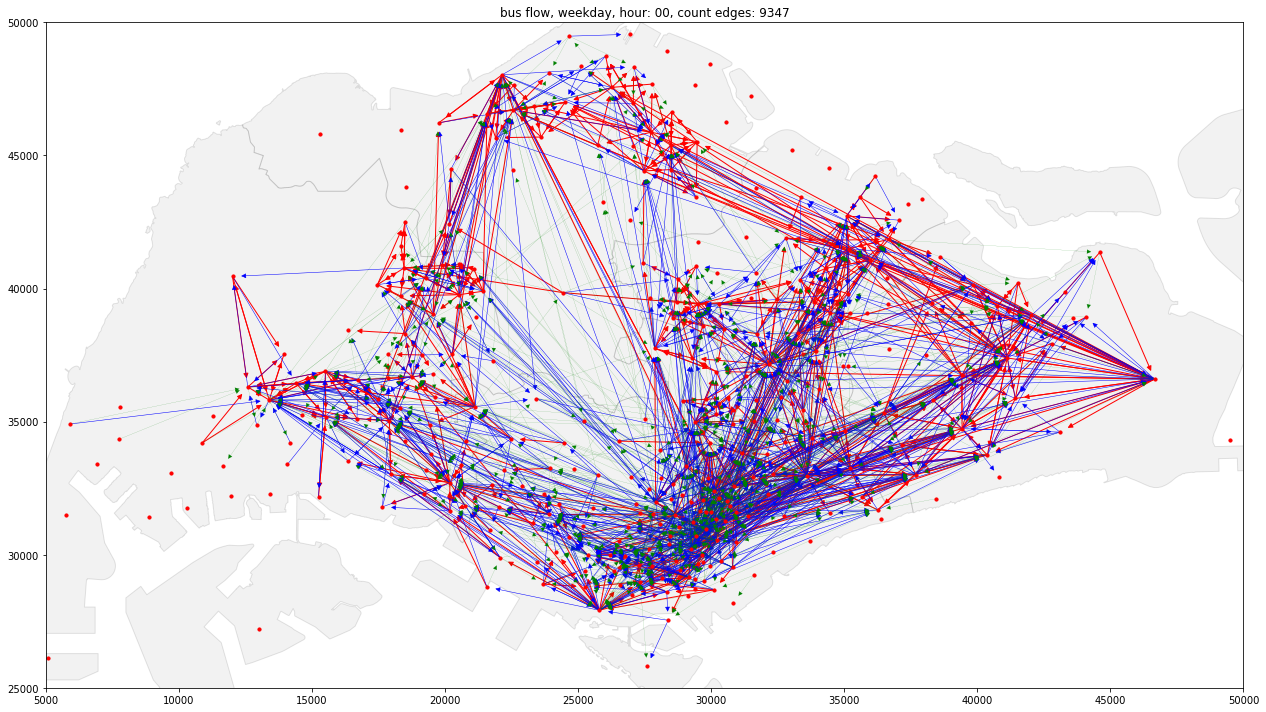

In [50]:
for f in fs[0:6]:
    print(f)
    hr = f[-6:-4]
    fp = os.path.join(data_dir, f)
    df = pd.read_csv(fp, index_col=0)
    df = df.dropna(subset=["origin", "destination"])
    recs = []
    for i in range(len(df)):
        row = df.iloc[i]
        o = row["origin"]
        d = row['destination']
        f = row['flow']
        recs.append((o,d,{"weight":f}))
    dg = nx.DiGraph()
    dg.add_nodes_from(list(pos.keys()))
    dg.add_edges_from(recs)
    draw_fig(dg, hr)
    print(hr, dg.number_of_nodes(), dg.number_of_edges())
    break
print("done")